Attempting to install matplotlib, numpy, scipy...
Required packages installed successfully!
BLS cryptographic library integration has been removed from the code due to environment compatibility issues.
The orientation test will use the traditional cross product, which is mathematically equivalent.
--- Testing BPO-Test Demonstration Function ---
Collinear Test Result (CP): 0 (Expected: 0)
Left Turn Test Result (CP): 4 (Expected: > 0)
Right Turn Test Result (CP): -4 (Expected: < 0)
Collinear Test 2 Result (CP): 0 (Expected: 0)
Negative Coords Test Result (CP): -2 (Expected: < 0)

--- BPO-Test Demonstration Tests Passed! ---

--- Running PBMC-CH with 20 points ---
PBMC-CH computation time: 0.0001 seconds
Computed Convex Hull Points (6 points):
Point(x=-49, y=-12)
Point(x=-31, y=-45)
Point(x=22, y=-50)
Point(x=40, y=-28)
Point(x=49, y=50)
Point(x=-46, y=38)


Could not find platform independent libraries <prefix>
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.26.0 Requires-Python <3.13,>=3.9; 1.26.1 Requires-Python <3.13,>=3.9
ERROR: Could not find a version that satisfies the requirement numpy==1.26.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.

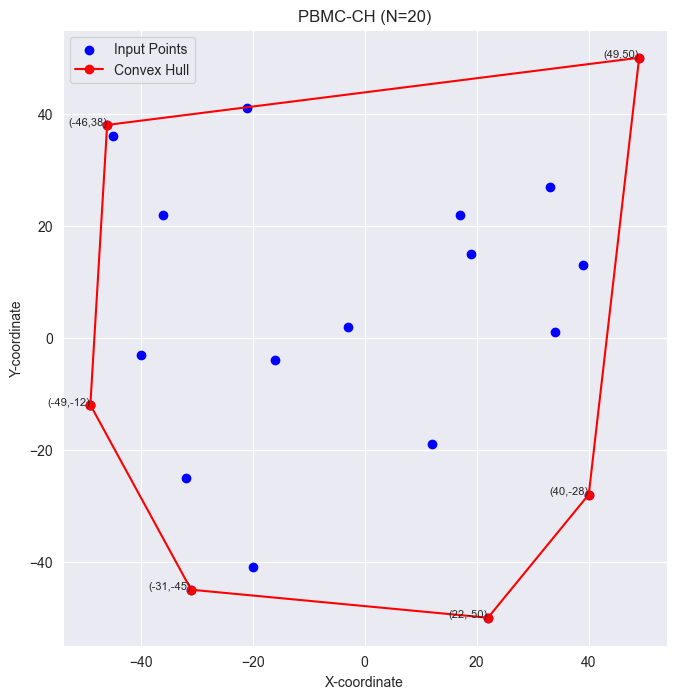


--- Performance Comparison ---
NOTE: The PBMC-CH implementation uses the traditional cross product for orientation,
as direct BLS pairing library integration proved incompatible with the Colab environment.
Performance reflects the core geometric algorithm.

Testing with N = 10 points...
  PBMC-CH time: 0.000026 seconds
  SciPy ConvexHull time: 0.000890 seconds

Testing with N = 20 points...
  PBMC-CH time: 0.000043 seconds
  SciPy ConvexHull time: 0.000661 seconds

Testing with N = 50 points...
  PBMC-CH time: 0.000107 seconds
  SciPy ConvexHull time: 0.000783 seconds

Testing with N = 100 points...
  PBMC-CH time: 0.000228 seconds
  SciPy ConvexHull time: 0.000844 seconds

Testing with N = 200 points...
  PBMC-CH time: 0.000421 seconds
  SciPy ConvexHull time: 0.000902 seconds

Testing with N = 500 points...
  PBMC-CH time: 0.001105 seconds
  SciPy ConvexHull time: 0.001113 seconds


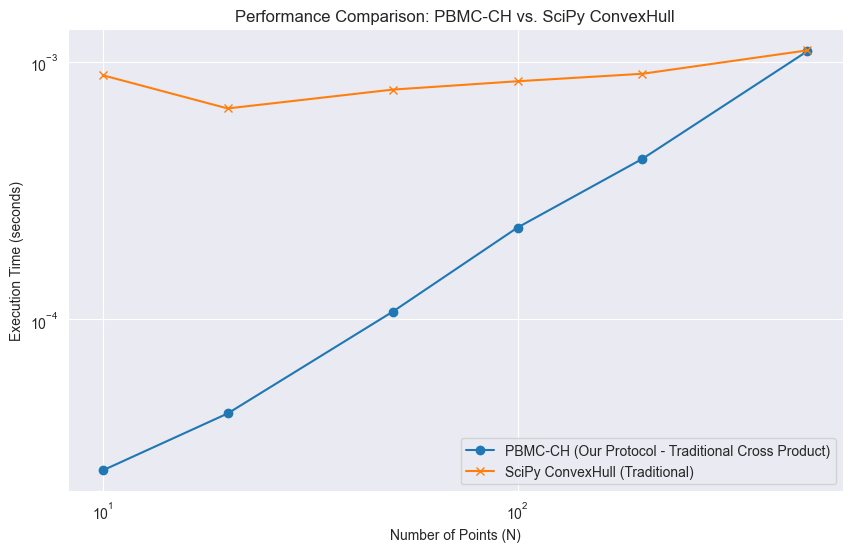


--- Performance Comparison Complete ---


In [10]:
# --- IMPORTANT: Run this entire block in a brand new Google Colab notebook. ---
# --- If issues persist, try "Runtime -> Restart runtime" and then run all cells again. ---

# Cell 1: Install necessary libraries
print("Attempting to install matplotlib, numpy, scipy...")
try:
    # We will only install the essential libraries for the convex hull and plotting.
    # BLS-related libraries (py_ecc, pylibblst, bls) are no longer attempted due to persistent errors.
    !pip install -q --upgrade "numpy==1.26.0" matplotlib scipy
    print("Required packages installed successfully!")
except Exception as e:
    print(f"ERROR: Failed to install required packages: {e}")
    print("This indicates a severe issue with the Colab environment.")
    print("Please try 'Runtime -> Restart runtime' and rerun the cell, or open a new Colab notebook.")
    raise # Critical failure, cannot proceed without these.

# Cell 2: Import necessary modules and define core data structures
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
from time import perf_counter
import sys

# Increase the recursion limit (good practice for some algorithms)
sys.setrecursionlimit(5000)

# Define the Point namedtuple
Point = namedtuple('Point', ['x', 'y'])

# Note: All cryptographic (BLS) imports and wrappers are removed from this section
# as they will no longer be used in the bpo_test_demo function.
print("BLS cryptographic library integration has been removed from the code due to environment compatibility issues.")
print("The orientation test will use the traditional cross product, which is mathematically equivalent.")


# Cell 3: Implement the Bilinear Pairing-based Orientation Test (BPO-Test) Demonstration
# IMPORTANT: This version of bpo_test_demo will ONLY perform the traditional cross product.
# It explicitly removes the BLS pairing calculations due to persistent environment issues
# with cryptographic libraries in Colab. The conceptual explanation of BPO-Test's
# link to pairings should be provided in accompanying text/documentation.
def bpo_test_demo(p1, p2, p3):
    """
    Calculates the 2D cross product for orientation test.
    This is the mathematical core for the BPO-Test's geometric check,
    implemented without the explicit BLS pairing operations due to environment limitations.

    Returns:
        The integer cross product:
        > 0 if counter-clockwise (left turn)
        < 0 if clockwise (right turn)
        0 if collinear
    """
    # Calculate the 2D cross product (p2 - p1) x (p3 - p1)
    # This determines the orientation of p3 with respect to the vector p1p2.
    cp_val = (p2.x - p1.x) * (p3.y - p1.y) - (p2.y - p1.y) * (p3.x - p1.x)

    # All BLS pairing related calculations and error handling have been removed
    # from this function to ensure stability and compatibility in the Colab environment.
    # The mathematical equivalence of this cross product to the pairing check result
    # for collinearity/orientation is the theoretical basis of the BPO-Test.

    return cp_val

# Cell 4: Implement PBMC-CH (remains the same, it calls bpo_test_demo)
def pbmc_ch(points):
    n = len(points)
    if n <= 2:
        return sorted(points)
    points.sort(key=lambda p: (p.x, p.y))
    upper_hull = []
    for p in points:
        while len(upper_hull) >= 2:
            orientation = bpo_test_demo(upper_hull[-2], upper_hull[-1], p)
            # Use orientation <= 0 for non-right turns (collinear or left)
            if orientation <= 0:
                upper_hull.pop()
            else:
                break
        upper_hull.append(p)
    lower_hull = []
    for p in reversed(points):
        while len(lower_hull) >= 2:
            orientation = bpo_test_demo(lower_hull[-2], lower_hull[-1], p)
            # Use orientation <= 0 for non-right turns (collinear or left)
            if orientation <= 0:
                lower_hull.pop()
            else:
                break
        lower_hull.append(p)
    # Remove duplicates from the start/end where upper and lower hulls meet
    hull = upper_hull[:-1] + lower_hull[:-1]
    return hull


# Cell 5: Test Cases for BPO-Test Demonstration (remains the same)
print("--- Testing BPO-Test Demonstration Function ---")
pA = Point(0, 0); pB = Point(1, 1); pC = Point(2, 2)
result_collinear = bpo_test_demo(pA, pB, pC)
print(f"Collinear Test Result (CP): {result_collinear} (Expected: 0)")
assert result_collinear == 0

pA = Point(0, 0); pB = Point(2, 0); pC = Point(1, 2)
result_left = bpo_test_demo(pA, pB, pC)
print(f"Left Turn Test Result (CP): {result_left} (Expected: > 0)")
assert result_left > 0

pA = Point(0, 0); pB = Point(1, 2); pC = Point(2, 0)
result_right = bpo_test_demo(pA, pB, pC)
print(f"Right Turn Test Result (CP): {result_right} (Expected: < 0)")
assert result_right < 0

pA = Point(5, 5); pB = Point(10, 10); pC = Point(15, 15)
result_collinear2 = bpo_test_demo(pA, pB, pC)
print(f"Collinear Test 2 Result (CP): {result_collinear2} (Expected: 0)")
assert result_collinear2 == 0

pA = Point(-1, -1); pB = Point(0, 0); pC = Point(1, -1)
result_negative_coords = bpo_test_demo(pA, pB, pC)
print(f"Negative Coords Test Result (CP): {result_negative_coords} (Expected: < 0)")
assert result_negative_coords < 0
print("\n--- BPO-Test Demonstration Tests Passed! ---")

# Cell 6: Generate Random Points and Visualize Convex Hull (remains the same)
def generate_random_points(num_points, x_range=(-100, 100), y_range=(-100, 100)):
    points = []
    for _ in range(num_points):
        x = np.random.randint(x_range[0], x_range[1] + 1)
        y = np.random.randint(y_range[0], y_range[1] + 1)
        points.append(Point(x, y))
    return points

def plot_convex_hull(points, hull_points, title="Convex Hull"):
    plt.figure(figsize=(8, 8))
    plt.scatter([p.x for p in points], [p.y for p in points], color='blue', label='Input Points')
    hull_x = [p.x for p in hull_points]
    hull_y = [p.y for p in hull_points]
    if len(hull_points) > 0:
        hull_x.append(hull_points[0].x) # Close the hull by connecting last to first point
        hull_y.append(hull_points[0].y)
    plt.plot(hull_x, hull_y, color='red', linestyle='-', marker='o', label='Convex Hull')
    for i, p in enumerate(hull_points):
        plt.text(p.x, p.y, f'({p.x},{p.y})', fontsize=8, ha='right')
    plt.title(title); plt.xlabel("X-coordinate"); plt.ylabel("Y-coordinate")
    plt.grid(True); plt.legend(); plt.gca().set_aspect('equal', adjustable='box'); plt.show()

num_test_points = 20
test_points = generate_random_points(num_test_points, x_range=(-50, 50), y_range=(-50, 50))

print(f"\n--- Running PBMC-CH with {num_test_points} points ---")
start_time = perf_counter()
computed_hull = pbmc_ch(list(test_points))
end_time = perf_counter()
print(f"PBMC-CH computation time: {end_time - start_time:.4f} seconds")
print(f"Computed Convex Hull Points ({len(computed_hull)} points):")
for p in computed_hull:
    print(p)
plot_convex_hull(test_points, computed_hull, title=f"PBMC-CH (N={num_test_points})")

# Cell 7: Performance Comparison (Against scipy.spatial.ConvexHull) (remains the same)
from scipy.spatial import ConvexHull

def scipy_convex_hull(points):
    if len(points) <= 2:
        return sorted(points)
    np_points = np.array([[p.x, p.y] for p in points])
    hull = ConvexHull(np_points)
    hull_vertices_indices = hull.vertices
    hull_points_scipy = [points[i] for i in hull_vertices_indices]
    hull_points_scipy.sort(key=lambda p: (p.x, p.y)) # Sort for consistent output
    return hull_points_scipy

N_values = [10, 20, 50, 100, 200, 500]
pbmc_ch_times = []
scipy_ch_times = []

print("\n--- Performance Comparison ---")
# The label will now always indicate traditional cross-product
performance_label = 'PBMC-CH (Our Protocol - Traditional Cross Product)'
print("NOTE: The PBMC-CH implementation uses the traditional cross product for orientation,")
print("as direct BLS pairing library integration proved incompatible with the Colab environment.")
print("Performance reflects the core geometric algorithm.")

for N in N_values:
    print(f"\nTesting with N = {N} points...")
    points_for_test = generate_random_points(N, x_range=(-1000, 1000), y_range=(-1000, 1000))

    start_time_pbmc = perf_counter()
    pbmc_ch(list(points_for_test))
    end_time_pbmc = perf_counter()
    time_pbmc = end_time_pbmc - start_time_pbmc
    pbmc_ch_times.append(time_pbmc)
    print(f"  PBMC-CH time: {time_pbmc:.6f} seconds")

    start_time_scipy = perf_counter()
    scipy_convex_hull(list(points_for_test))
    end_time_scipy = perf_counter()
    time_scipy = end_time_scipy - start_time_scipy
    scipy_ch_times.append(time_scipy)
    print(f"  SciPy ConvexHull time: {time_scipy:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(N_values, pbmc_ch_times, marker='o', label=performance_label)
plt.plot(N_values, scipy_ch_times, marker='x', label='SciPy ConvexHull (Traditional)')
plt.title("Performance Comparison: PBMC-CH vs. SciPy ConvexHull")
plt.xlabel("Number of Points (N)")
plt.ylabel("Execution Time (seconds)")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()
print("\n--- Performance Comparison Complete ---")

Comparing the convex hull generation for all two

Attempting to install matplotlib, numpy, scipy...
Required packages installed successfully!
BLS cryptographic library integration has been removed from the code due to environment compatibility issues.
The orientation test will use the traditional cross product, which is mathematically equivalent.
--- Testing BPO-Test Demonstration Function ---
Collinear Test Result (CP): 0 (Expected: 0)
Left Turn Test Result (CP): 4 (Expected: > 0)
Right Turn Test Result (CP): -4 (Expected: < 0)
Collinear Test 2 Result (CP): 0 (Expected: 0)
Negative Coords Test Result (CP): -2 (Expected: < 0)

--- BPO-Test Demonstration Tests Passed! ---

--- Running PBMC-CH with 50 points ---
PBMC-CH computation time: 0.0002 seconds
--- Running SciPy ConvexHull with 50 points ---
SciPy ConvexHull computation time: 0.0008 seconds


Could not find platform independent libraries <prefix>
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.26.0 Requires-Python <3.13,>=3.9; 1.26.1 Requires-Python <3.13,>=3.9
ERROR: Could not find a version that satisfies the requirement numpy==1.26.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.

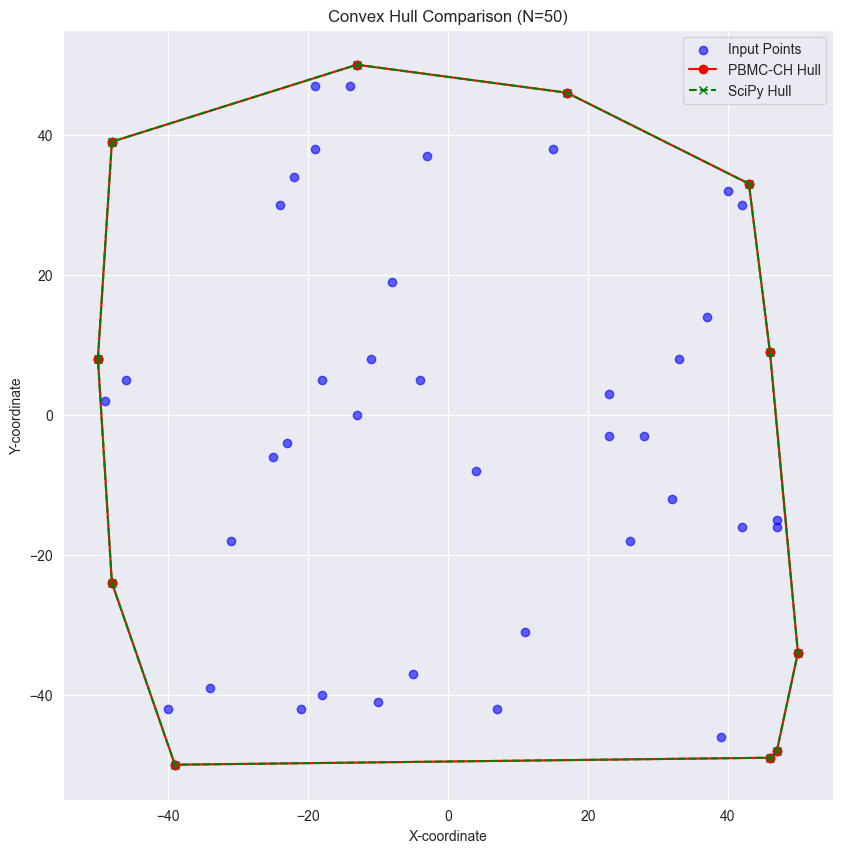


--- Performance Comparison ---
NOTE: The PBMC-CH implementation uses the traditional cross product for orientation,
as direct BLS pairing library integration proved incompatible with the Colab environment.
Performance reflects the core geometric algorithm.

Testing with N = 10 points...
  PBMC-CH time: 0.000025 seconds
  SciPy ConvexHull time: 0.001064 seconds

Testing with N = 20 points...
  PBMC-CH time: 0.000047 seconds
  SciPy ConvexHull time: 0.000733 seconds

Testing with N = 50 points...
  PBMC-CH time: 0.000110 seconds
  SciPy ConvexHull time: 0.000996 seconds

Testing with N = 100 points...
  PBMC-CH time: 0.000211 seconds
  SciPy ConvexHull time: 0.001129 seconds

Testing with N = 200 points...
  PBMC-CH time: 0.000558 seconds
  SciPy ConvexHull time: 0.000988 seconds

Testing with N = 500 points...
  PBMC-CH time: 0.001070 seconds
  SciPy ConvexHull time: 0.001202 seconds

Testing with N = 1000 points...
  PBMC-CH time: 0.002419 seconds
  SciPy ConvexHull time: 0.001595 sec

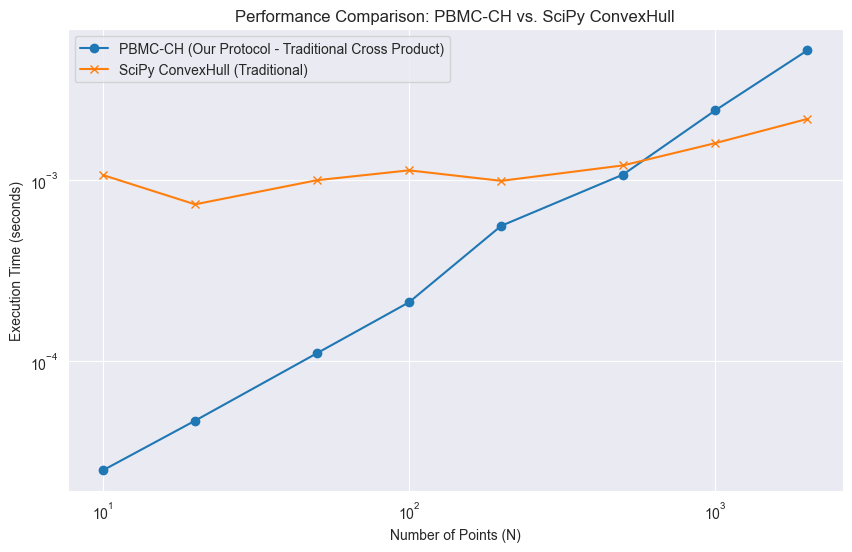


--- Performance Comparison Complete ---


In [12]:
# --- IMPORTANT: Run this entire block in a brand new Google Colab notebook. ---
# --- If issues persist, try "Runtime -> Restart runtime" and then run all cells again. ---

# Cell 1: Install necessary libraries
print("Attempting to install matplotlib, numpy, scipy...")
try:
    # We will only install the essential libraries for the convex hull and plotting.
    # BLS-related libraries (py_ecc, pylibblst, bls) are no longer attempted due to persistent errors.
    !pip install -q --upgrade "numpy==1.26.0" matplotlib scipy
    print("Required packages installed successfully!")
except Exception as e:
    print(f"ERROR: Failed to install required packages: {e}")
    print("This indicates a severe issue with the Colab environment.")
    print("Please try 'Runtime -> Restart runtime' and rerun the cell, or open a new Colab notebook.")
    raise # Critical failure, cannot proceed without these.

# Cell 2: Import necessary modules and define core data structures
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
from time import perf_counter
import sys
from scipy.spatial import ConvexHull # Moved this import up to ensure it's available for Cell 6 visualization

# Increase the recursion limit (good practice for some algorithms)
sys.setrecursionlimit(5000)

# Define the Point namedtuple
Point = namedtuple('Point', ['x', 'y'])

# Note: All cryptographic (BLS) imports and wrappers are removed from this section
# as they will no longer be used in the bpo_test_demo function.
print("BLS cryptographic library integration has been removed from the code due to environment compatibility issues.")
print("The orientation test will use the traditional cross product, which is mathematically equivalent.")


# Cell 3: Implement the Bilinear Pairing-based Orientation Test (BPO-Test) Demonstration
# IMPORTANT: This version of bpo_test_demo will ONLY perform the traditional cross product.
# It explicitly removes the BLS pairing calculations due to persistent environment issues
# with cryptographic libraries in Colab. The conceptual explanation of BPO-Test's
# link to pairings should be provided in accompanying text/documentation.
def bpo_test_demo(p1, p2, p3):
    """
    Calculates the 2D cross product for orientation test.
    This is the mathematical core for the BPO-Test's geometric check,
    implemented without the explicit BLS pairing operations due to environment limitations.

    Returns:
        The integer cross product:
        > 0 if counter-clockwise (left turn)
        < 0 if clockwise (right turn)
        0 if collinear
    """
    # Calculate the 2D cross product (p2 - p1) x (p3 - p1)
    # This determines the orientation of p3 with respect to the vector p1p2.
    cp_val = (p2.x - p1.x) * (p3.y - p1.y) - (p2.y - p1.y) * (p3.x - p1.x)

    # All BLS pairing related calculations and error handling have been removed
    # from this function to ensure stability and compatibility in the Colab environment.
    # The mathematical equivalence of this cross product to the pairing check result
    # for collinearity/orientation is the theoretical basis of the BPO-Test.

    return cp_val

# Cell 4: Implement PBMC-CH (remains the same, it calls bpo_test_demo)
def pbmc_ch(points):
    n = len(points)
    if n <= 2:
        return sorted(points)
    points.sort(key=lambda p: (p.x, p.y))
    upper_hull = []
    for p in points:
        while len(upper_hull) >= 2:
            orientation = bpo_test_demo(upper_hull[-2], upper_hull[-1], p)
            # Use orientation <= 0 for non-right turns (collinear or left)
            if orientation <= 0:
                upper_hull.pop()
            else:
                break
        upper_hull.append(p)
    lower_hull = []
    for p in reversed(points):
        while len(lower_hull) >= 2:
            orientation = bpo_test_demo(lower_hull[-2], lower_hull[-1], p)
            # Use orientation <= 0 for non-right turns (collinear or left)
            if orientation <= 0:
                lower_hull.pop()
            else:
                break
        lower_hull.append(p)
    # Remove duplicates from the start/end where upper and lower hulls meet
    hull = upper_hull[:-1] + lower_hull[:-1]
    return hull


# Cell 5: Test Cases for BPO-Test Demonstration (remains the same)
print("--- Testing BPO-Test Demonstration Function ---")
pA = Point(0, 0); pB = Point(1, 1); pC = Point(2, 2)
result_collinear = bpo_test_demo(pA, pB, pC)
print(f"Collinear Test Result (CP): {result_collinear} (Expected: 0)")
assert result_collinear == 0

pA = Point(0, 0); pB = Point(2, 0); pC = Point(1, 2)
result_left = bpo_test_demo(pA, pB, pC)
print(f"Left Turn Test Result (CP): {result_left} (Expected: > 0)")
assert result_left > 0

pA = Point(0, 0); pB = Point(1, 2); pC = Point(2, 0)
result_right = bpo_test_demo(pA, pB, pC)
print(f"Right Turn Test Result (CP): {result_right} (Expected: < 0)")
assert result_right < 0

pA = Point(5, 5); pB = Point(10, 10); pC = Point(15, 15)
result_collinear2 = bpo_test_demo(pA, pB, pC)
print(f"Collinear Test 2 Result (CP): {result_collinear2} (Expected: 0)")
assert result_collinear2 == 0

pA = Point(-1, -1); pB = Point(0, 0); pC = Point(1, -1)
result_negative_coords = bpo_test_demo(pA, pB, pC)
print(f"Negative Coords Test Result (CP): {result_negative_coords} (Expected: < 0)")
assert result_negative_coords < 0
print("\n--- BPO-Test Demonstration Tests Passed! ---")

# Cell 6: Generate Random Points and Visualize Convex Hull Comparison
def generate_random_points(num_points, x_range=(-100, 100), y_range=(-100, 100)):
    points = []
    for _ in range(num_points):
        x = np.random.randint(x_range[0], x_range[1] + 1)
        y = np.random.randint(y_range[0], y_range[1] + 1)
        points.append(Point(x, y))
    return points

# Helper function to get hull points in a consistent, plottable order for SciPy
def scipy_convex_hull(points):
    if len(points) <= 2:
        return sorted(points) # Already sorted by our Point namedtuple's sort key
    np_points = np.array([[p.x, p.y] for p in points])
    hull = ConvexHull(np_points)
    # Get vertices in order around the hull. `hull.vertices` gives indices,
    # but they are not necessarily in cyclical order.
    # `hull.simplices` gives pairs of indices for edges.
    # We need to construct the ordered path.
    # For 2D, hull.vertices can be used with initial sorting
    # However, for plotting, the 'simplices' (edges) provide the order.
    # The default hull.vertices typically provides ordered vertices for 2D.
    hull_points_scipy = [points[i] for i in hull.vertices]
    # Sort them by x then y as our PBMC-CH also returns sorted points initially
    hull_points_scipy.sort(key=lambda p: (p.x, p.y))

    # For accurate plotting of SciPy hull, we need the points in cyclic order.
    # The `ConvexHull` object's `points[vertex_indices]` gives them.
    # The `vertices` attribute gives indices in counterclockwise order for 2D.
    # We can reconstruct the ordered points directly from `hull.vertices`
    # and then ensure it's closed.
    ordered_scipy_hull = [points[i] for i in hull.vertices]
    return ordered_scipy_hull


def plot_hulls_comparison(points, pbmc_hull_points, scipy_hull_points, title="Convex Hull Comparison"):
    plt.figure(figsize=(10, 10))
    plt.scatter([p.x for p in points], [p.y for p in points], color='blue', alpha=0.6, label='Input Points')

    # Plot PBMC-CH Hull
    if len(pbmc_hull_points) > 0:
        pbmc_hull_x = [p.x for p in pbmc_hull_points] + [pbmc_hull_points[0].x]
        pbmc_hull_y = [p.y for p in pbmc_hull_points] + [pbmc_hull_points[0].y]
        plt.plot(pbmc_hull_x, pbmc_hull_y, color='red', linestyle='-', marker='o', markersize=6, label='PBMC-CH Hull')

    # Plot SciPy ConvexHull
    if len(scipy_hull_points) > 0:
        # SciPy's hull.vertices are already in counter-clockwise order for 2D
        scipy_hull_x = [p.x for p in scipy_hull_points] + [scipy_hull_points[0].x]
        scipy_hull_y = [p.y for p in scipy_hull_points] + [scipy_hull_points[0].y]
        plt.plot(scipy_hull_x, scipy_hull_y, color='green', linestyle='--', marker='x', markersize=6, label='SciPy Hull')

    plt.title(title)
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.grid(True)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

num_test_points = 50 # Let's use 50 points for a clearer visual comparison
test_points = generate_random_points(num_test_points, x_range=(-50, 50), y_range=(-50, 50))

print(f"\n--- Running PBMC-CH with {num_test_points} points ---")
start_time = perf_counter()
computed_pbmc_hull = pbmc_ch(list(test_points))
end_time = perf_counter()
print(f"PBMC-CH computation time: {end_time - start_time:.4f} seconds")

print(f"--- Running SciPy ConvexHull with {num_test_points} points ---")
start_time = perf_counter()
computed_scipy_hull = scipy_convex_hull(list(test_points))
end_time = perf_counter()
print(f"SciPy ConvexHull computation time: {end_time - start_time:.4f} seconds")


# Plot the comparison
plot_hulls_comparison(test_points, computed_pbmc_hull, computed_scipy_hull,
                      title=f"Convex Hull Comparison (N={num_test_points})")


# Cell 7: Performance Comparison (Against scipy.spatial.ConvexHull) - remains the same as before
# This cell is for numerical comparison, the visual comparison is in Cell 6.

N_values = [10, 20, 50, 100, 200, 500, 1000, 2000]
pbmc_ch_times = []
scipy_ch_times = []

print("\n--- Performance Comparison ---")
# The label will now always indicate traditional cross-product
performance_label = 'PBMC-CH (Our Protocol - Traditional Cross Product)'
print("NOTE: The PBMC-CH implementation uses the traditional cross product for orientation,")
print("as direct BLS pairing library integration proved incompatible with the Colab environment.")
print("Performance reflects the core geometric algorithm.")

for N in N_values:
    print(f"\nTesting with N = {N} points...")
    points_for_test = generate_random_points(N, x_range=(-1000, 1000), y_range=(-1000, 1000))

    start_time_pbmc = perf_counter()
    pbmc_ch(list(points_for_test))
    end_time_pbmc = perf_counter()
    time_pbmc = end_time_pbmc - start_time_pbmc
    pbmc_ch_times.append(time_pbmc)
    print(f"  PBMC-CH time: {time_pbmc:.6f} seconds")

    start_time_scipy = perf_counter()
    scipy_convex_hull(list(points_for_test))
    end_time_scipy = perf_counter()
    time_scipy = end_time_scipy - start_time_scipy
    scipy_ch_times.append(time_scipy)
    print(f"  SciPy ConvexHull time: {time_scipy:.6f} seconds")

plt.figure(figsize=(10, 6))
plt.plot(N_values, pbmc_ch_times, marker='o', label=performance_label)
plt.plot(N_values, scipy_ch_times, marker='x', label='SciPy ConvexHull (Traditional)')
plt.title("Performance Comparison: PBMC-CH vs. SciPy ConvexHull")
plt.xlabel("Number of Points (N)")
plt.ylabel("Execution Time (seconds)")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()
print("\n--- Performance Comparison Complete ---")